## Phase 4 Project: Twitter Sentiment Analysis for Apple and Google Products
**Collaborators:** 
>- Shamla Tadese
>- Jeniffer Gatharia
>- Ruth Kioko
>- Robert Kalafa
>- Ilyas Bourzat 
>- Julliet Mwaura
* Student Pace:  **DSF-PT07 PART TIME**
* Instructor Name: **WINNIE ANYOSO, SAMUEL G. MWANGI and SAMUEL KARU**

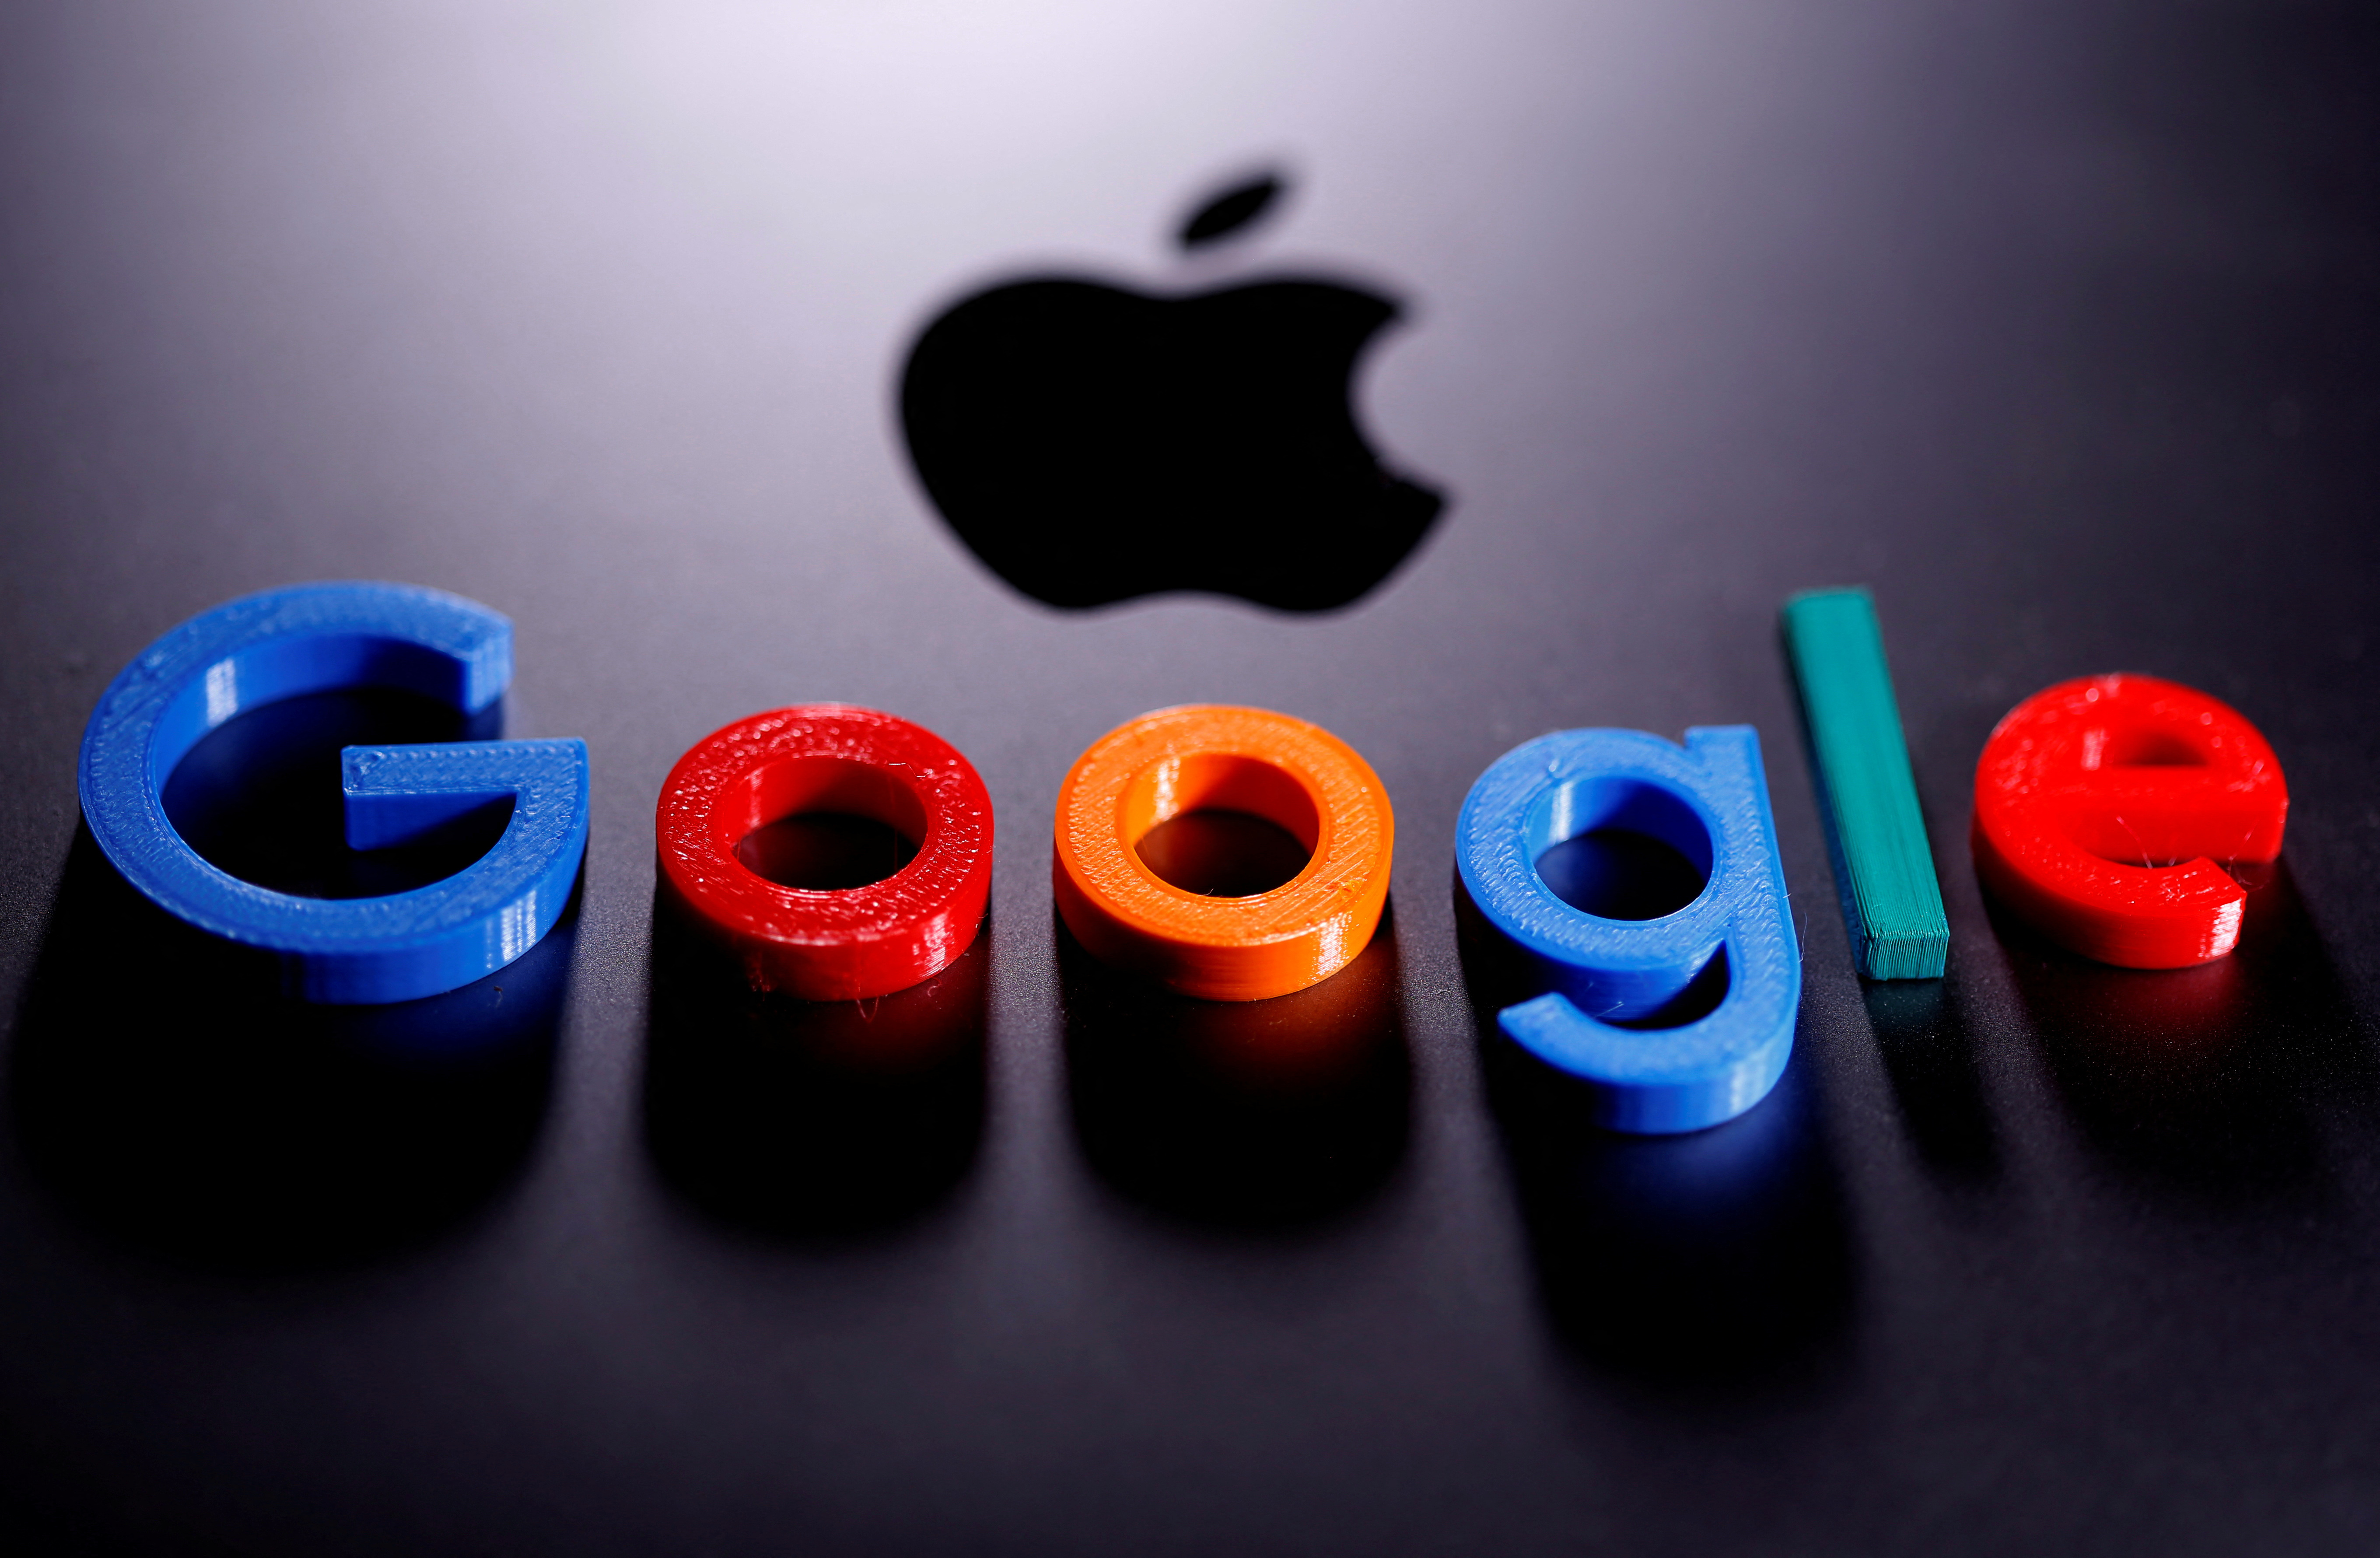

# 1.0 Business Understanding

## 1.1 Background

NiaTech has been actively marketing and selling products from Apple and Google for the past year. With a significant portion of their customer engagement occurring on Twitter, they recognize the importance of understanding customer sentiment towards these products. Sentiment analysis will help NiaTech gauge public perception, identify potential issues, and uncover opportunities for improvement. The company has hired us to develop a machine learning model to classify sentiments expressed in tweets related to Apple and Google products. The model will categorize sentiments into positive, negative, and neutral, enabling Niatech to derive actionable insights from customer feedback.

## 1.2 Problem Statement
NiaTech aims to boost customer engagement and refine marketing strategy by utilizing a machine learning model for sentiment analysis of tweets about Apple and Google products. The goal is to correctly categorize sentiments as positive, negative, or neutral, which will help NiaTech grasp public perception, pinpoint potential issues and identify opportunities for improvement based on customer feedback.

## 1.3 Objectives
>- Develop a machine learning model to correctly classify sentiments in tweets as positive, negative, or neutral regarding Apple and Google products.
>- Identify and analyze which product has the highest and lowest sentiment scores, highlighting areas for potential improvement.
>- Assess the overall sentiment trends towards Apple and Google to inform NiaTech’s strategic decision on continuing partnerships with these companies.

## 1.4 Metric of Success
To measure the success of this sentiment analysis project, we will focus on the following key metrics:
* Classification Accuracy: Achieve at least 85% accuracy in correctly classifying tweets as positive, negative, or neutral.
* Precision and Recall: Maintain a precision and recall of at least 80% for each sentiment category, ensuring reliable identification of sentiments.
* Sentiment Score Analysis: Successfully identify the brand with the highest and lowest sentiment scores, providing actionable insights for improvement.
* Customer Feedback Utilization: Deliver actionable insights that lead to a measurable increase in customer engagement and strategic decision-making regarding partnerships

# 2.0 Data Understanding

The dataset for this project, sourced from https://data.world/crowdflower/brands-and-product-emotions is well-suited for our objectives. This rich resource is ideal for training and testing our sentiment analysis models, effectively capturing real-world sentiment from a platform where users openly share their opinions.

The dataset comprises three columns and 9,093 rows:

*  tweet_text: The text of the tweets.
*  emotion_in_tweet_is_directed_at: Insights into the emotions expressed.
*  is_there_an_emotion_directed_at_a_brand_or_product: Indicates the specific brand or product related to the emotion.

# Importing the Relevant Libraries

In [68]:
# Import all the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import matplotlib.cm as cm
import os
import re
import nltk
import string
from nltk import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

# Downloading nltk metrics
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/madservices/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/madservices/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/madservices/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading the Data

In [69]:
# Loading the dataset
df = pd.read_csv("data/judge-1377884607_tweet_product_company.csv", encoding='unicode_escape')

# Checking the dataset
df.head()
print()
print(df.describe())


                                               tweet_text  \
count                                                9092   
unique                                               9065   
top     RT @mention Marissa Mayer: Google Will Connect...   
freq                                                    5   

       emotion_in_tweet_is_directed_at  \
count                             3291   
unique                               9   
top                               iPad   
freq                               946   

       is_there_an_emotion_directed_at_a_brand_or_product  
count                                                9093  
unique                                                  4  
top                    No emotion toward brand or product  
freq                                                 5389  


In [70]:
# Getting information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [71]:
# Getting the shape of the data
df.shape

(9093, 3)

In [72]:
# Calculate sentiment counts
sentiment_counts = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
print(sentiment_counts)

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64


In [73]:
# Examine text data to see what kind of data we are working with
df.head()

tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion

**The following observations were made;**

*  The dataset consists of 9,093 rows and 3 columns.
*  The columns are labeled 'tweet_text', 'emotion_in_tweet_is_directed_at', and 'is_there_an_emotion_directed_at_a_brand_or_product'.
*  The 'is_there_an_emotion_directed_at_a_brand_or_product' column includes four unique values: 'No emotion toward brand or product', 'Positive emotion', 'Negative emotion', and 'I can't tell'.
*  The 'emotion_in_tweet_is_directed_at' column contains nine unique values.

# 3.0 Data Cleaning and Data Preparation
This section focuses on preparing the data for exploratory data analysis (EDA) and modeling. We will examine the dataset for:

* Duplicate rows
* Missing values
* During our analysis, we will rename columns to enhance the dataset's readability, clarity and user-friendliness. 
* Cleaning text data
* Text Vectorization

In [74]:
# Renaming the columns for ease of access
df.rename(columns={
    'tweet_text': 'Tweet',
    'emotion_in_tweet_is_directed_at': 'Product',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'Sentiment'
}, inplace=True)

In [75]:
# Checking the data to confirm that columns have been renamed
df.head()

Tweet             Product  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

          Sentiment  
0  Negative emotion  
1  Positive emotion  
2  Positive emotion  
3  Negative emotion  
4  Positive emotion

In [76]:
# Getting information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet      9092 non-null   object
 1   Product    3291 non-null   object
 2   Sentiment  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


Clearly, we have one missing value in the Tweet column and over 5,000 missing values in the Product column. Since the Product column is essential for our analysis, we will fill the missing values with placeholder entries and remove the single row with the missing Tweet value.

In [77]:
# Dropping a row from the Tweet column
df.dropna(subset=['Tweet'], inplace=True)

# Filling the missing values in the Product column with placeholder values
df['Product'].fillna('Unknown Product', inplace=True)

# Checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet      9092 non-null   object
 1   Product    9092 non-null   object
 2   Sentiment  9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


In [78]:
# Checking for duplicates
df.duplicated().sum()

22

There are 22 duplicate values in the dataset that we need to examine closely to determine if they represent the same values from different tweets. 
If they are indeed the same, we will retain them; otherwise, we will remove them and proceed with processing the dataset.

In [79]:
# Investigating the duplicates
duplicates = df[df.duplicated()]
duplicates

Tweet             Product  \
468      Before It Even Begins, Apple Wins #SXSW {link}               Apple   
776   Google to Launch Major New Social Network Call...     Unknown Product   
2232  Marissa Mayer: Google Will Connect the Digital...     Unknown Product   
2559  Counting down the days to #sxsw plus strong Ca...               Apple   
3950  Really enjoying the changes in Gowalla 3.0 for...         Android App   
3962  #SXSW is just starting, #CTIA is around the co...             Android   
4897  Oh. My. God. The #SXSW app for iPad is pure, u...  iPad or iPhone App   
5338  RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ...     Unknown Product   
5341  RT @mention ÷¼ Happy Woman's Day! Make love, ...     Unknown Product   
5881  RT @mention Google to Launch Major New Social ...     Unknown Product   
5882  RT @mention Google to Launch Major New Social ...     Unknown Product   
5883  RT @mention Google to Launch Major New Social ...     Unknown Product   
5884  RT @mention Google to Launch Major New Social ...     Unknown Product   
5885  RT @mention Google to Launch Major New Social ...     Unknown Product   
6296  RT @mention Marissa Mayer: Google Will Connect...              Google   
6297  RT @mention Marissa Mayer: Google Will Connect...     Unknown Product   
6298  RT @mention Marissa Mayer: Google Will Connect...              Google   
6299  RT @mention Marissa Mayer: Google Will Connect...     Unknown Product   
6300  RT @mention Marissa Mayer: Google Will Connect...     Unknown Product   
6546  RT @mention RT @mention Google to Launch Major...     Unknown Product   
8483  I just noticed DST is coming this weekend. How...              iPhone   
8747  Need to buy an iPad2 while I'm in Austin at #s...                iPad   

                               Sentiment  
468                     Positive emotion  
776   No emotion toward brand or product  
2232  No emotion toward brand or product  
2559                    Positive emotion  
3950                    Positive emotion  
3962                    Positive emotion  
4897                    Positive emotion  
5338  No emotion toward brand or product  
5341  No emotion toward brand or product  
5881  No emotion toward brand or product  
5882  No emotion toward brand or product  
5883  No emotion toward brand or product  
5884  No emotion toward brand or product  
5885  No emotion toward brand or product  
6296                    Positive emotion  
6297  No emotion toward brand or product  
6298                    Positive emotion  
6299  No emotion toward brand or product  
6300  No emotion toward brand or product  
6546  No emotion toward brand or product  
8483                    Negative emotion  
8747                    Positive emotion

In [80]:
# Dropping duplicates across all the columns and keeping only the first 
df = df.drop_duplicates(subset=('Tweet', 'Product', 'Sentiment'), keep='first')

# Checking for duplicates again
df.duplicated().sum()

0

In [81]:
# Running a sentiment count at this point
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Sentiment
No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64

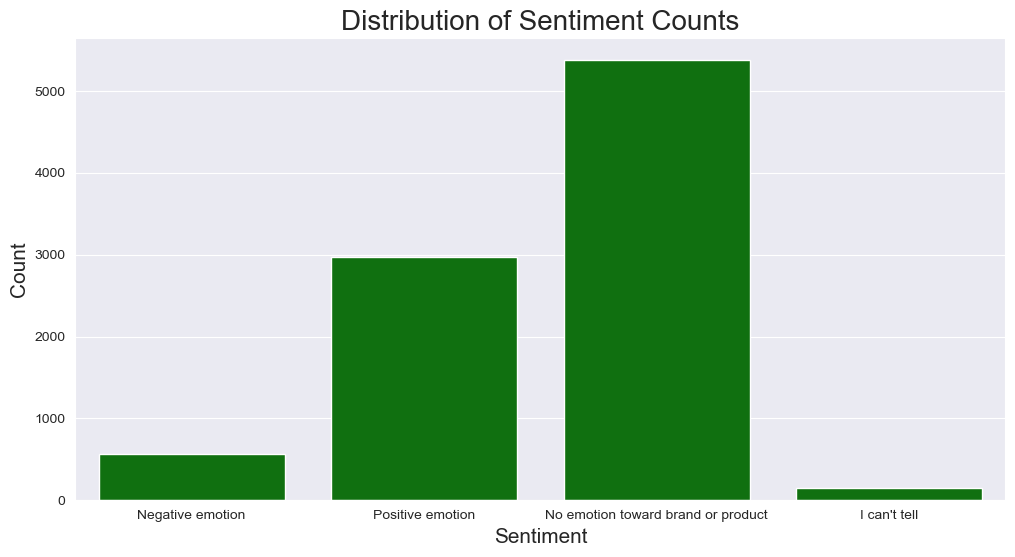

In [82]:
# Visualization of the sentiment values to get a better understanding.
# Plotting the sentiments
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment', data=df, color = 'green')
plt.title('Distribution of Sentiment Counts', size=20)
plt.xlabel('Sentiment', size=15)
plt.ylabel('Count', size=15)
plt.show()

There are four sentiment classes in total, with the neutral emotion ('No emotion...') being the most common. Additionally, the 'I can't tell' sentiment represents only a small fraction of the data. This sentiment is somewhat similar to the neutral class, which raises the possibility of combining them. However, since the neutral class already dominates the dataset, leading to significant imbalance, we will remove entries labeled with this sentiment.

In [83]:
# Dropping the 'I can't tell' class label
df = df[(df['Sentiment']!= "I can't tell")]

# Renaming the 'No emotion toward brand or product" to 'Neutral'
df['Sentiment'].replace('No emotion toward brand or product', 'Neutral')

# Encoding class label to brief
label_encoder = {'Negative emotion': 'negative',
                 'Positive emotion': 'positive',
                 'No emotion toward brand or product': 'neutral'}

df['Sentiment'] = df['Sentiment'].map(label_encoder)

# Running sentiment count again
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Sentiment
neutral     5375
positive    2970
negative     569
Name: count, dtype: int64

In [84]:
# Checking the Product column in the dataset
# Running product count 
product_counts = df['Product'].value_counts()
product_counts

Product
Unknown Product                    5641
iPad                                941
Apple                               657
iPad or iPhone App                  469
Google                              427
iPhone                              295
Other Google product or service     292
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64

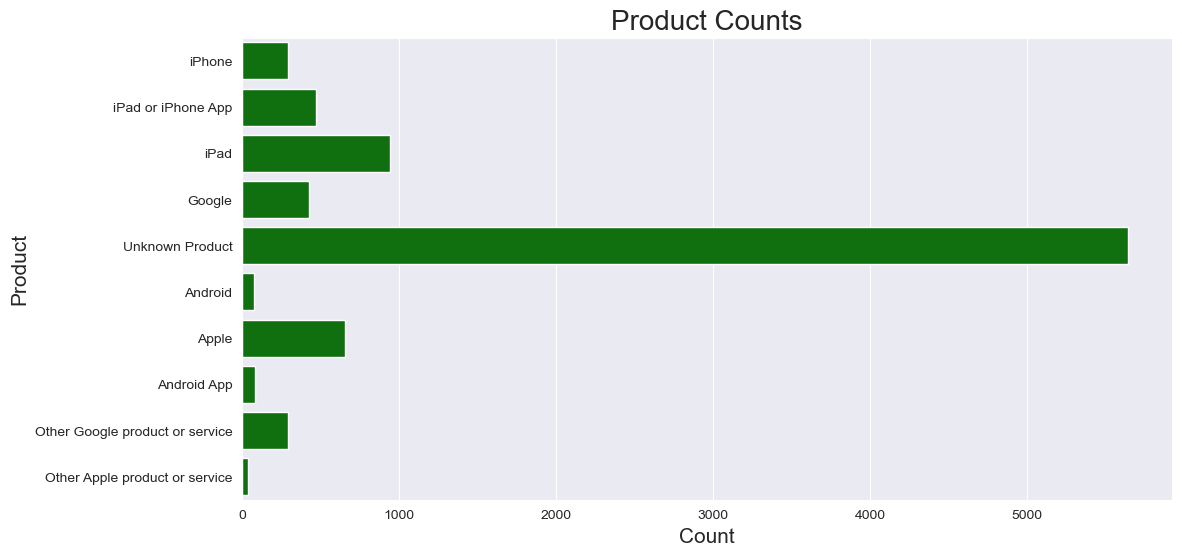

In [85]:
# Plotting product counts
fig =  plt.figure(figsize=(12,6))
sns.countplot(y='Product', data=df, color = 'green')
plt.title('Product Counts', size=20)
plt.xlabel('Count', size=15)
plt.ylabel('Product', size=15)
plt.show()

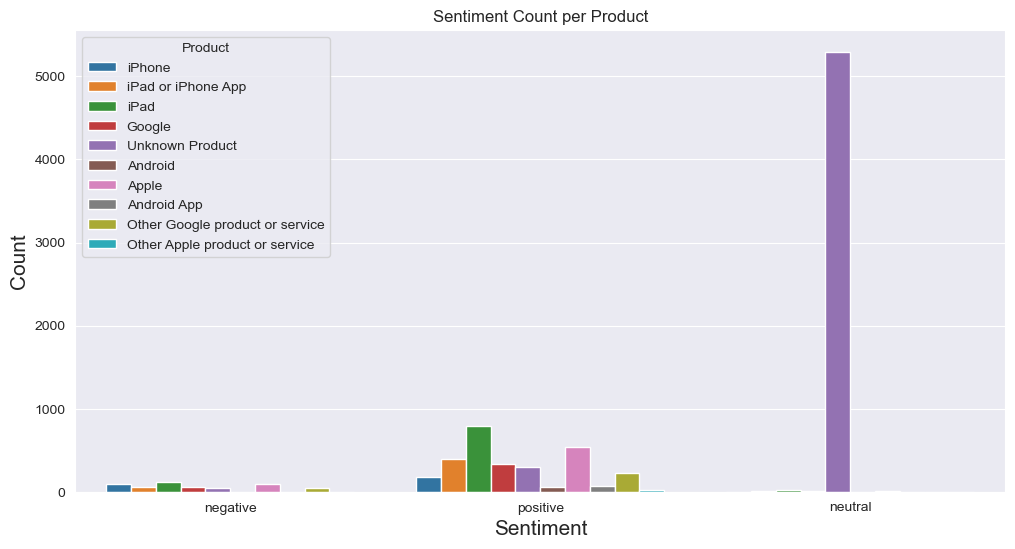

In [86]:
# Plotting sentiment count for each product
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x = 'Sentiment', hue='Product')
plt.title('Sentiment Count per Product')
plt.xlabel('Sentiment', size=15)
plt.ylabel('Count', size=15)
plt.show()

In [87]:
# Investigating the product column with 'Unknown' values
unknown_products = df[df['Product'] == 'Unknown Product']
unknown_products.value_counts().sum()

5641

The 'Unknown Product' class includes tweets that mention either Apple or Google brands or products. Given the size of this class, it's more effective to extract those keywords from the tweets and input them into the product column. Any entries that do not include references to Apple or Google will be removed, which should help balance our dataset.

In [88]:
# Listing all the tweets in the unknown class that contain any word related to apple or google products
apple_keywords = [
    "apple", "iPhone", "iPad", "MacBook", "Apple Watch", 
    "AirPods", "Apple TV", "Apple Music", "iCloud", 
    "AppleCare", "iPod", "Apple Pay", "ios", "iPhone app"
]
google_keywords = ["Pixel", "Google Home", "Google Assistant", "Chromebook", 
                   "Android App", "Android", "Google Search", "Google Maps", 
                   "Google Drive", "Google Docs", "Google Sheets", "Google Slides", 
                   "Google Photos", "Google Play", "Google Assistant", "Google Home", "Pixel (Phone)", 
    "Pixelbook", "Chromebook", "Nest (Products)", "Google Chrome", "Android", "Gmail",
    "Google AdWords", "Google Analytics", "YouTube", "Google Cloud", "Google Duo", "Google Meet", "Google Fi"]

all_keywords = apple_keywords + google_keywords

# Function to extract product keywords from a tweet
def extract_product_keyword(tweet):
    for keyword in all_keywords:
        if re.search(r'\b' + re.escape(keyword) + r'\b', tweet, re.IGNORECASE):
            return keyword
    return None

# Replace 'Unknown Product' with detected product keywords
df['Product'] = df.apply(lambda row: extract_product_keyword(row['Tweet']) if row['Product'] == "Unknown Product" else row['Product'], axis=1)

# Running product count again
product_counts = df['Product'].value_counts()
product_counts

Product
iPad                               1890
apple                              1176
iPhone                             1160
Apple                               657
iPad or iPhone App                  469
Google                              427
Other Google product or service     292
Android                             265
Android App                         101
Google Maps                          76
Other Apple product or service       35
ios                                  19
Google Analytics                     16
Google Docs                          10
YouTube                               5
Google Search                         5
Google Chrome                         3
Google AdWords                        2
Gmail                                 2
Name: count, dtype: int64

In [89]:
# Cleaning the data by handling unknown products and null values, and then performing a sentiment analysis based on valid product entries.
# Checking the product column to see if it still contains "Unknown Product"
unknown_products = df[df['Product'] == 'Unknown Product']
unknown_products.value_counts().sum()

# Drop any None values
df_1 = df[df['Product'].notnull()]

df_1.info()

# Running sentiment count for each product
df_product_sentiment = df.groupby(['Product', 'Sentiment']).size().reset_index(name='Count')

df_product_sentiment

<class 'pandas.core.frame.DataFrame'>
Index: 6610 entries, 0 to 9091
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet      6610 non-null   object
 1   Product    6610 non-null   object
 2   Sentiment  6610 non-null   object
dtypes: object(3)
memory usage: 206.6+ KB


Product Sentiment  Count
0                           Android  negative     10
1                           Android   neutral    176
2                           Android  positive     79
3                       Android App  negative      8
4                       Android App   neutral     21
5                       Android App  positive     72
6                             Apple  negative     95
7                             Apple   neutral     21
8                             Apple  positive    541
9                             Gmail   neutral      2
10                           Google  negative     68
11                           Google   neutral     15
12                           Google  positive    344
13                   Google AdWords   neutral      2
14                 Google Analytics   neutral     13
15                 Google Analytics  positive      3
16                    Google Chrome   neutral      3
17                      Google Docs   neutral      9
18                      Google Docs  positive      1
19                      Google Maps   neutral     70
20                      Google Maps  positive      6
21                    Google Search   neutral      5
22   Other Apple product or service  negative      2
23   Other Apple product or service   neutral      1
24   Other Apple product or service  positive     32
25  Other Google product or service  negative     47
26  Other Google product or service   neutral      9
27  Other Google product or service  positive    236
28                          YouTube   neutral      5
29                            apple  negative      7
30                            apple   neutral   1107
31                            apple  positive     62
32                             iPad  negative    135
33                             iPad   neutral    899
34                             iPad  positive    856
35               iPad or iPhone App  negative     63
36               iPad or iPhone App   neutral     10
37               iPad or iPhone App  positive    396
38                           iPhone  negative    114
39                           iPhone   neutral    804
40                           iPhone  positive    242
41                              ios   neutral     16
42                              ios  positive      3

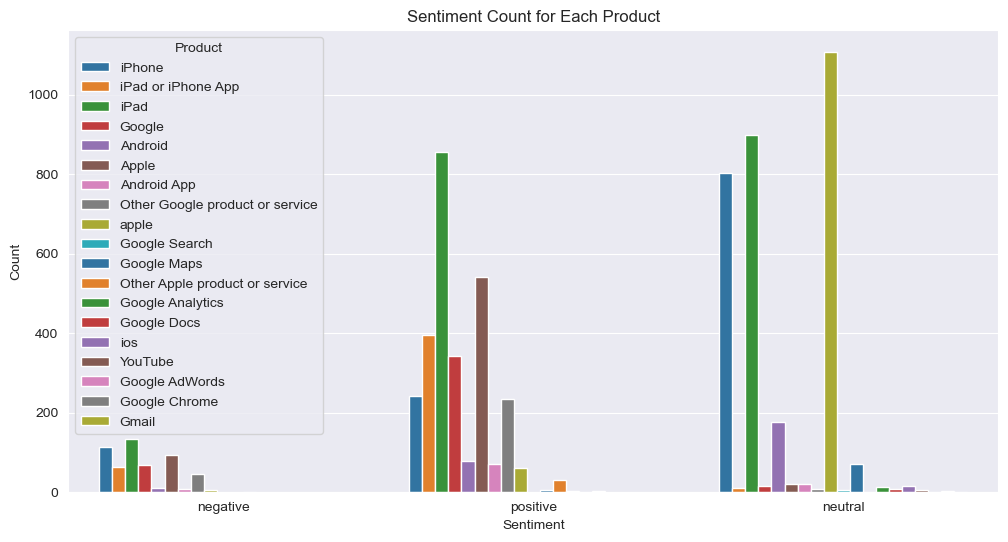

In [90]:
# Plotting sentiment count for each product
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_1, x='Sentiment', hue='Product', palette='tab10')
plt.title('Sentiment Count for Each Product')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Product')
plt.show()

The product column is divided into several classes that can be primarily categorized into two groups: Apple and Google. This is what we will address in the next cell below.
From our observations, Apple products are dominant in all the sentiment classes possibly pointing to the fact that majority of the consumers interact with Apple products.

In [91]:
# Creating a copy of the dataframe
df_clean = df_1.copy()

In [92]:
# Sample list of entries
entries = [
    "Android", "Android", "Android", "Android App", "Android App", "Android App",
    "Apple", "Apple", "Apple", "Gmail", "Google", "Google", "Google AdWords",
    "Google Analytics", "Google Analytics", "Google Chrome", "Google Docs",
    "Google Docs", "Google Maps", "Google Maps", "Google Search",
    "Other Apple product or service", "Other Apple product or service",
    "Other Apple product or service", "Other Google product or service",
    "Other Google product or service", "Other Google product or service",
    "YouTube", "apple", "apple", "apple", "iPad", "iPad", "iPad",
    "iPad or iPhone App", "iPad or iPhone App", "iPad or iPhone App",
    "iPhone", "iPhone", "iPhone", "ios", "ios"
]

# Define the mapping
apple_keywords = ["Apple", "iPhone", "iPad", "AirPods", "MacBook", "ios", "Other Apple product or service"]
google_keywords = ["Google", "Gmail", "Google Drive", "Google Docs", "Google Maps", "YouTube", 
                  "Google Chrome", "Google Search", "Google Analytics", "Google AdWords", 
                  "Android", "Android App", "Other Google product or service"]

# Function to categorize each entry
def categorize(entry):
    entry_lower = entry.lower()
    if any(keyword.lower() in entry_lower for keyword in apple_keywords):
        return "Apple"
    elif any(keyword.lower() in entry_lower for keyword in google_keywords):
        return "Google"
    else:
        return "Other"

# Create key-value pair list
key_value_pairs = {entry: categorize(entry) for entry in entries}

# Print the resulting dictionary
print(key_value_pairs)

{'Android': 'Google', 'Android App': 'Google', 'Apple': 'Apple', 'Gmail': 'Google', 'Google': 'Google', 'Google AdWords': 'Google', 'Google Analytics': 'Google', 'Google Chrome': 'Google', 'Google Docs': 'Google', 'Google Maps': 'Google', 'Google Search': 'Google', 'Other Apple product or service': 'Apple', 'Other Google product or service': 'Google', 'YouTube': 'Google', 'apple': 'Apple', 'iPad': 'Apple', 'iPad or iPhone App': 'Apple', 'iPhone': 'Apple', 'ios': 'Apple'}


In [93]:
# Categorizing the products into two main groups for simplifying further analysis.
# Brand name mapping
brand = {'Android': 'Google', 'Android App': 'Google', 'Apple': 'Apple', 'Gmail': 'Google', 
         'Google': 'Google', 'Google AdWords': 'Google', 'Google Analytics': 'Google', 
         'Google Chrome': 'Google', 'Google Docs': 'Google', 'Google Maps': 'Google', 
         'Google Search': 'Google', 'Other Apple product or service': 'Apple', 
         'Other Google product or service': 'Google', 'YouTube': 'Google', 'apple': 'Apple', 
         'iPad': 'Apple', 'iPad or iPhone App': 'Apple', 'iPhone': 'Apple', 'ios': 'Apple'}

# Applying the mapping
df_clean['Product'] = df_clean['Product'].map(brand)
df_clean['Product'].value_counts()

Product
Apple     5406
Google    1204
Name: count, dtype: int64

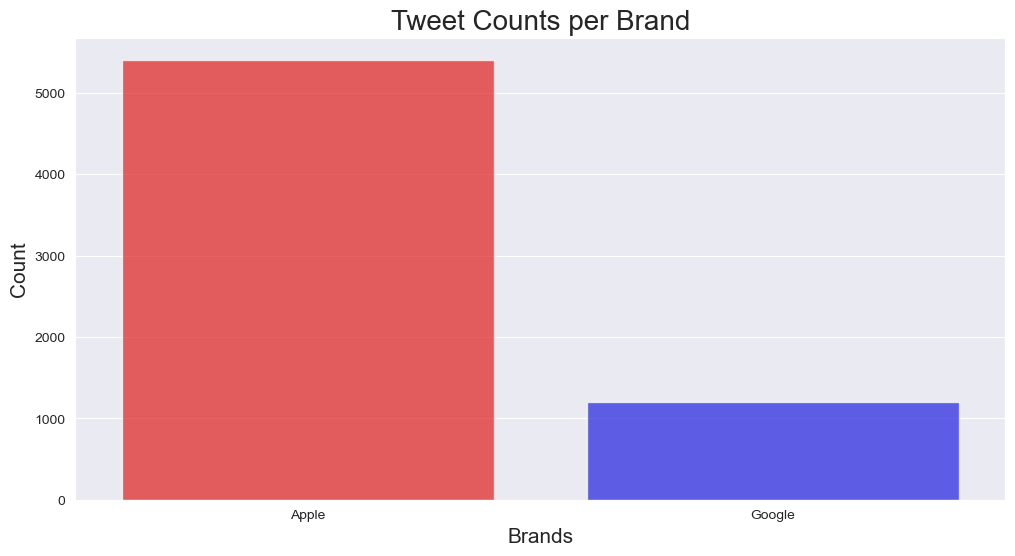

In [94]:
# Plotting the tweet counts for each of the mapped brands
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='Product', data=df_clean, hue='Product', palette={'Apple':'r', 'Google':'b', 'Unknown':'g'}, alpha=0.7)
plt.title('Tweet Counts per Brand', size=20)
plt.xlabel('Brands', size=15)
plt.ylabel('Count', size=15)
plt.show()

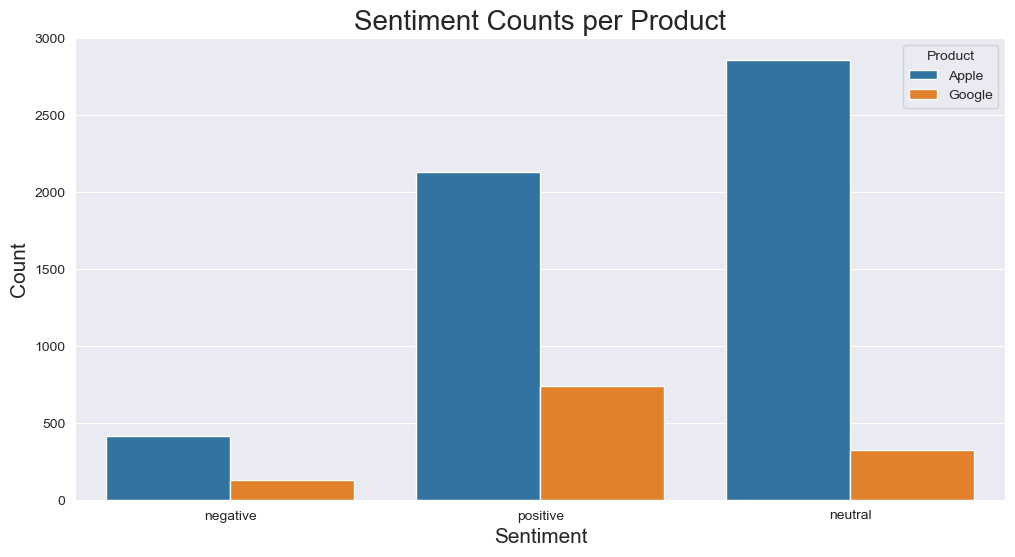

In [95]:
# Plotting the sentiment counts and comparing them against each other
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df_clean, x = 'Sentiment', hue='Product')
plt.title('Sentiment Counts per Product', size=20)
plt.xlabel('Sentiment', size=15)
plt.ylabel('Count', size=15)
plt.show()

We can observe a clear class imbalance between the two brands. We will address this later for a better model performance.

## Text Preprocessing
Now, let's proceed with the text preprocessing steps. We will:

1. Fix contracted words
2. Remove URLs
3. Remove punctuation
4. Convert all text to lowercase
5. Remove stopwords
6. Apply stemming and lemmatization

We will also create a function to perform these steps.

### Fixing Contracted Words
Punctuation is one of the major problems in text analysis, so it needs to be removed from the text. However, sometime it may affect the words such as: 'you're, I've,...' because it will basically try to remove the letter around apostrophe, and thus altering the context. Below, we will implement a detailed contraction mapping so that contracted words are expanded to their full form.

In [96]:
# Defining a function that removes contractions and expands words to their original form and cleans them up by removing punctuations, symbols and underscores etc.
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                   "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" 


# Function to expand contractions
def expand_contractions(text):
    # Expand contractions
    for contraction, full_form in contraction_mapping.items():
        text = text.replace(contraction, full_form)
    return text


# In order to be on the safe side, we will create another column 'Clean_Tweets' and assign all the decontracted words to that column.
# Expanding the contracted words
df_clean['Clean_Tweets'] = df['Tweet'].apply(expand_contractions)

df_clean.head()

Tweet Product Sentiment  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   Apple  negative   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   Apple  positive   
2  @swonderlin Can not wait for #iPad 2 also. The...   Apple  positive   
3  @sxsw I hope this year's festival isn't as cra...   Apple  negative   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...  Google  positive   

                                        Clean_Tweets  
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...  
1  @jessedee Know about @fludapp ? Awesome iPad/i...  
2  @swonderlin Can not wait for #iPad 2 also. The...  
3  @sxsw I hope this year's festival is not as cr...  
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...

Here we are going to define and apply a function that will remove all the words that are not necessary for the process of sentiment analysis.

In [97]:
# Defining a function that cleans the tweets by removing URLs, removing punctuation, converting all text to lowercase, removing stopwords
# Load English stopwords
stop_words = set(stopwords.words('english'))

# Defining a function that cleans the tweet
def clean_tweet(tweet):
    # Step 1: Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    
    # Step 2: Remove user mentions
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Step 3: Remove hashtags
    tweet = re.sub(r'#\w+', '', tweet)
    
    # Step 4: Remove punctuation (excluding apostrophes)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    
    # Step 5: Convert to lowercase
    tweet = tweet.lower()
    
    # Step 6: Remove stopwords
    tweet = ' '.join(word for word in tweet.split() if word not in stop_words)
    
    # Step 7: Remove extra whitespace
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    
    # Step 8: Remove numbers
    tweet = re.sub(r'\b[0-9]+\b', '', tweet)
    
    # Step 9: Remove words with less than 3 letters
    tweet = ' '.join(word for word in tweet.split() if len(word) >= 3)

    return tweet

# Define a pipeline function that returns the cleaned tweets 
def clean_tweet_pipeline(tweets):
    return [clean_tweet(tweet) for tweet in tweets]

# Applying the cleaning pipeline to the tweets
df_clean['Clean_Tweets'] = clean_tweet_pipeline(df_clean['Clean_Tweets'])

# Comparing the result
print(df_clean[['Tweet', 'Clean_Tweets']])

                                                  Tweet  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
9085  I've always used Camera+ for my iPhone b/c it ...   
9086  Google says: want to give a lightning talk to ...   
9087  @mention Yup, but I don't have a third app yet...   
9088                      Ipad everywhere. #SXSW {link}   
9091  Some Verizon iPhone customers complained their...   

                                           Clean_Tweets  
0     iphone hrs tweeting dead need upgrade plugin s...  
1     know awesome ipadiphone app likely appreciate ...  
2                                        wait also sale  
3           hope years festival crashy years iphone app  
4

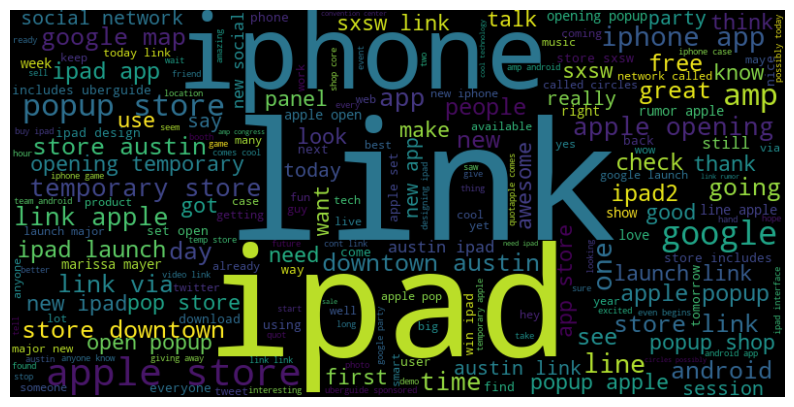

In [98]:
# Word cloud for visualizing frequent words
from wordcloud import WordCloud

all_words = ' '.join(df_clean['Clean_Tweets'])
wordcloud = WordCloud(width=800, height=400).generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Handling Class Imbalance

In [99]:
# Check class distribution in the Sentiment column
class_distribution = df_clean['Sentiment'].value_counts()
print(class_distribution)

# Import the resample module from sklearn utils
from sklearn.utils import resample

positive = df_clean[df_clean['Sentiment'] == 'positive']
negative = df_clean[df_clean['Sentiment'] == 'negative']
neutral = df_clean[df_clean['Sentiment'] == 'neutral']

# Upsample negative and positive classes
negative_upsampled = resample(negative, replace=True, n_samples=class_distribution.max(), random_state=42)
positive_upsampled = resample(positive, replace=True, n_samples=class_distribution.max(), random_state=42)

# Combine back to a balanced dataset
balanced_data = pd.concat([positive_upsampled, negative_upsampled, neutral])
print(balanced_data['Sentiment'].value_counts())

Sentiment
neutral     3188
positive    2873
negative     549
Name: count, dtype: int64
Sentiment
positive    3188
negative    3188
neutral     3188
Name: count, dtype: int64


In [100]:
# Checking the sentiment count for each productclear
product_sentiment_count = balanced_data.groupby('Product')['Sentiment'].value_counts()
print(product_sentiment_count)

Product  Sentiment
Apple    neutral      2858
         negative     2399
         positive     2353
Google   positive      835
         negative      789
         neutral       330
Name: count, dtype: int64


In [101]:
# Let us correct the class imbalance between the two product
balanced_data = balanced_data.groupby('Product').apply(lambda x: x.sample(n=class_distribution.max(), replace=True)).reset_index(drop=True)

# Checking the product count after balancing
print(balanced_data['Product'].value_counts())

# Checking the sentiment count per each product after balancing
product_sentiment_count = balanced_data.groupby('Product')['Sentiment'].value_counts()
print(product_sentiment_count)

Product
Apple     3188
Google    3188
Name: count, dtype: int64
Product  Sentiment
Apple    neutral      1231
         negative     1020
         positive      937
Google   positive     1378
         negative     1276
         neutral       534
Name: count, dtype: int64


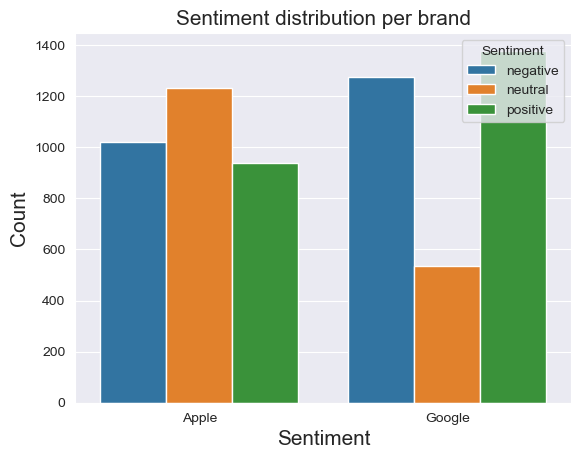

In [102]:
# Plotting sentiment distribution per product from the new balanced data
sns.countplot(x='Product', hue='Sentiment', data=balanced_data)
plt.title('Sentiment distribution per brand', size=15)
plt.xlabel('Sentiment', size=15)
plt.ylabel('Count', size=15)
plt.show()


The sentiment analysis shows that Apple products receive more neutral feedback, with a balanced distribution of positive and negative sentiments. In contrast, Google products elicit polarized reactions, with nearly equal positive and negative sentiments, but fewer neutral opinions. Overall, Apple evokes more mixed feelings, while Google sparks stronger, more divided responses.

Now that we have our data all sorted and balanced let us proceed to stemming and lemmatizing the data

## Word Tokenization

In [103]:
# Import the stemmer and lemmatizer classes
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Initialize tokenize, stemmer and lemmatizer
tokenizer = TweetTokenizer()
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def tokenize_stem_and_lemmatize(text):
    # Tokenize the text into words
    words = text.split()
    
    # Stem and lemmatize each word
    stemmed_words = [stemmer.stem(word) for word in words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]
    
    # Join the words back into a sentence
    return' '.join(lemmatized_words)

# Applying the stemming and lemmatization pipeline to the tweets
balanced_data['Clean_Tweets'] = balanced_data['Clean_Tweets'].apply(tokenize_stem_and_lemmatize)

# Comparing the result
balanced_data[['Tweet', 'Clean_Tweets']].head()

Tweet  \
0  Nothing says DOUCHE CAKE like walking around w...   
1  #Apple to Open Pop-Up Shop at #SXSW [REPORT] {...   
2  ÛÏ@mention #Apple wins #SXSW {link} Opening a...   
3  Data on my iPhone finally sorted. Next stop: #...   
4  After you get your food, don't forget to snap ...   

                                        Clean_Tweets  
0  noth say douch cake like walk around ipad like...  
1                        open popup shop report link  
2  win link open temporari store downtown austin ...  
3                    data iphon final sort next stop  
4  get food forget snap photo win macbook air ipa...

[('googl', 2288), ('link', 2210), ('ipad', 1301), ('appl', 964), ('app', 882), ('iphon', 881), ('new', 757), ('store', 707), ('android', 670), ('launch', 549), ('social', 431), ('map', 427), ('austin', 407), ('circl', 396), ('get', 392), ('today', 328), ('amp', 323), ('use', 308), ('network', 308), ('mobil', 296)]


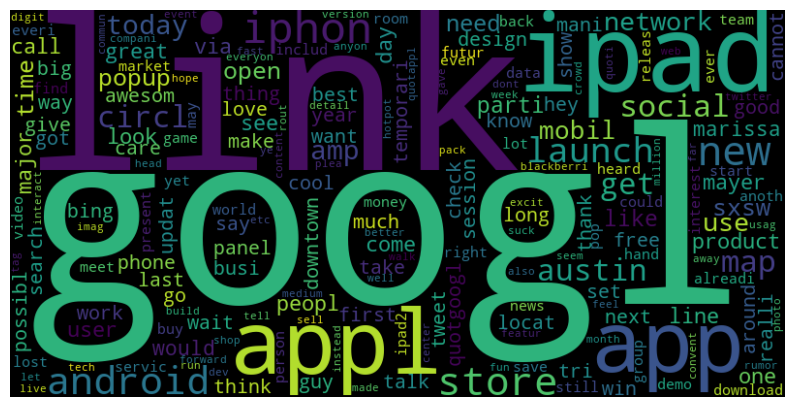

In [104]:
# Checking the frequency distribution of the tokens
all_tokens = [token for tweet in balanced_data['Clean_Tweets'] for token in tweet.split()]
freq_dist = FreqDist(all_tokens)

print(freq_dist.most_common(20))

# Visualise the frequency distribution of the tokens in word cloud after balancing
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(freq_dist)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Optional: Hide the axes
plt.show()  # Display the plot

After handling the class imbalance noted, our observation is that Google now becomes the most prevalent word as seen from the word cloud visualization above.

## Splitting the Data
### Validation Strategy
With a datset of 6610 entries we need to make sure that we give enough data for our model to train on and validate, therefore we follow the following validation strategy.
We are going to split the data into training, validation and testing sets. This way we can train and validate the model and test it using the unseen test set to determine its real world performance and decide whether it is fit enough to be used by customers.

This stage flows as follows:

**Step 1: Split Data into Test Set:**

We first split our dataset into a training/validation set **(X_train_val, y_train_val)** and a test set **(X_test, y_test)**, where **10%** of the data is reserved for testing.
The **stratify=y** parameter ensures that the class distribution is maintained in both the training and test sets.

**Step 2: Split Training/Validation Set:**

The next split takes the remaining **90%** of the data and further divides it into a training set **(X_train, y_train)** and a validation set **(X_val, y_val)**, with **20%** of that **90%** used for validation.
Again, **stratify=y_train_val** maintains the class distribution in the training and validation sets.

**Step 3: Check Sizes of the Splits:**

Finally, we print out the sizes of the training, validation, and test sets to confirm the splits.

In [105]:
# Defining the features (X) and target (y)
X = balanced_data['Clean_Tweets']
y = balanced_data['Sentiment']

# Step 1: Split data in test size (10%) for multiclass
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Step 2: Split the data in validation size (20%) for multiclass
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.20, random_state=42, stratify=y_train_val)

# Check the size of the splits for multiclass
print(f"Multiclass - Training set size: {len(X_train)}")
print(f"Multiclass - Validation set size: {len(X_val)}")
print(f"Multiclass - Test set size: {len(X_test)}")

Multiclass - Training set size: 4590
Multiclass - Validation set size: 1148
Multiclass - Test set size: 638


## Vectorizing the Sets

In [106]:
# Initialize a TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the validation data
X_val_tfidf = vectorizer.transform(X_val)

# Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)

# 4.0 Modeling

## 4.1 Logistic Regression
Logistic regression is chosen as the baseline model due to its simplicity and effectiveness in binary classification tasks like sentiment analysis. It assumes a linear relationship between the features and the log odds of the sentiments, making it easy to interpret and efficient for smaller datasets. Using this model as a starting point allows us to establish a baseline for comparison with more complex models.

In [107]:
# Import the logistic regression model
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
baseline_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
baseline_model.fit(X_train_tfidf, y_train)

# Predict the sentiment on the val set
y_pred_baseline = baseline_model.predict(X_val_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_baseline)
print("Accuracy (Baseline):", accuracy)

print(classification_report(y_val, y_pred_baseline))

Accuracy (Baseline): 0.828397212543554
              precision    recall  f1-score   support

    negative       0.90      0.93      0.92       413
     neutral       0.73      0.76      0.74       318
    positive       0.84      0.77      0.80       417

    accuracy                           0.83      1148
   macro avg       0.82      0.82      0.82      1148
weighted avg       0.83      0.83      0.83      1148



The model attained an overall accuracy of about 82%. It excelled at classifying negative sentiments, achieving a precision of 0.90 and a recall of 0.93. However, the neutral and positive classes exhibited lower precision and recall, especially for neutral sentiments, highlighting difficulties in accurately identifying that category. Overall, the model demonstrates balanced performance across all classes, with a slight advantage in effectively managing negative sentiments.

## 4.2 Support Vector Machine Classifier
SVM is highly effective in high-dimensional spaces and can manage non-linear relationships through the use of kernel functions. It is especially beneficial for text data, where the vocabulary can be extensive. By employing hyperparameter tuning via grid search and utilizing pipelines, SVM can frequently surpass simpler models like logistic regression or Naive Bayes, particularly in scenarios where sentiment boundaries are not linearly separable.

In [108]:
# Initialize a Support Vector Machine classifier
from sklearn.svm import SVC

# Initialize the Support Vector Machine classifier with a linear kernel (default) and random state=42
clf = SVC(kernel='linear', random_state=42)

# Train the classifier
clf.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_val_tfidf)

# Evaluate the classifier
from sklearn.metrics import accuracy_score, classification_report

# Print the accuracy score and classification report
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy (SVM):", accuracy)

print(classification_report(y_val, y_pred))

Accuracy (SVM): 0.8449477351916377
              precision    recall  f1-score   support

    negative       0.92      0.94      0.93       413
     neutral       0.73      0.80      0.76       318
    positive       0.86      0.78      0.82       417

    accuracy                           0.84      1148
   macro avg       0.84      0.84      0.84      1148
weighted avg       0.85      0.84      0.85      1148



The SVM model attained an accuracy of around 84%, demonstrating an improvement over the baseline. It performed particularly well in classifying negative sentiments, achieving a precision of 0.92 and a recall of 0.94. Although the neutral class continues to be challenging, with a precision of 0.73, the positive class displayed strong performance, suggesting a generally robust capability for sentiment analysis overall.

## 4.3 Random Forest classification
Random Forest is an ensemble model that merges multiple decision trees to minimize variance and enhance accuracy. It is resilient against overfitting and effectively handles non-linear relationships among features. Given the complexity and diversity of language in tweets, Random Forest can identify more nuanced patterns than logistic regression or Naive Bayes.

In [109]:
# Importing the random forest library
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 estimators and random state=42
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_clf.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred_rf = rf_clf.predict(X_val_tfidf)

# Evaluate the classifier
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)

print(classification_report(y_val, y_pred_rf))

Accuracy (Random Forest): 0.8693379790940766
              precision    recall  f1-score   support

    negative       0.96      0.97      0.97       413
     neutral       0.75      0.84      0.79       318
    positive       0.88      0.79      0.83       417

    accuracy                           0.87      1148
   macro avg       0.86      0.87      0.86      1148
weighted avg       0.87      0.87      0.87      1148



The Random Forest model attained an impressive accuracy of approximately 87%, representing a significant enhancement. It excelled in classifying negative sentiments, achieving a precision of 0.96 and a recall of 0.97. While the neutral and positive classes exhibited solid but slightly lower metrics, the model demonstrates strong overall performance in sentiment analysis, maintaining a good balance across all classes.

## 4.4 Naive Bayes classification

Naive Bayes is frequently utilized for text classification tasks, particularly when using word-based feature extraction methods like TF-IDF. Although this model assumes independence among features—an assumption that doesn't always hold true in practice—it remains computationally efficient and often performs effectively in sentiment analysis, especially when handling high-dimensional text data.

In [110]:
# Importing the library
from sklearn.naive_bayes import MultinomialNB

# Initialize a Multinomial Naive Bayes classifier
nb_clf = MultinomialNB()

# Train the classifier
nb_clf.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred_nb = nb_clf.predict(X_val_tfidf)

# Evaluate the classifier
accuracy_nb = accuracy_score(y_val, y_pred_nb)
print("Accuracy (Naive Bayes):", accuracy_nb)

print(classification_report(y_val, y_pred_nb))

Accuracy (Naive Bayes): 0.7987804878048781
              precision    recall  f1-score   support

    negative       0.88      0.90      0.89       413
     neutral       0.73      0.66      0.69       318
    positive       0.77      0.81      0.79       417

    accuracy                           0.80      1148
   macro avg       0.79      0.79      0.79      1148
weighted avg       0.80      0.80      0.80      1148



The Naive Bayes model achieved an accuracy of around 79%, which is lower than that of the other models. It excelled in identifying negative sentiments, attaining a precision of 0.88 and a recall of 0.90. However, it struggled with the neutral class, showing a recall of just 0.66, while the positive class performed moderately. Overall, the model demonstrates decent capability, but there is potential for improvement, particularly in classifying neutral sentiments.

## 4.5 NLP (Natural Language Processing) SVC Pipleline
This classifier will return the same output as the SVC classifier we have used above. The only reason we have it here is to demonstrate how it works with pipelines.

In [111]:
# Importing the necessary library
from sklearn.pipeline import Pipeline

# Initialize a pipeline with the TfidfVectorizer and the SVC classifier
nlp_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='linear', random_state=42))
])

# Train the pipeline
nlp_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_nlp = nlp_clf.predict(X_val)

# Evaluate the classifier
accuracy_nlp = accuracy_score(y_val, y_pred_nlp)
print("Accuracy (NLP):", accuracy_nlp)

print(classification_report(y_val, y_pred_nlp))

Accuracy (NLP): 0.8449477351916377
              precision    recall  f1-score   support

    negative       0.92      0.94      0.93       413
     neutral       0.73      0.80      0.76       318
    positive       0.86      0.78      0.82       417

    accuracy                           0.84      1148
   macro avg       0.84      0.84      0.84      1148
weighted avg       0.85      0.84      0.85      1148



The NLP model attained an accuracy of about 84%, matching the performance of the SVM model. It excelled in classifying negative sentiments, achieving a precision of 0.92 and a recall of 0.94. The neutral class exhibited consistent metrics, with a precision of 0.73 and a recall of 0.80, while the positive class also showed solid performance. Overall, the model demonstrates strong sentiment analysis capabilities, particularly for negative sentiments, while maintaining balanced performance across all classes.

## Hyperparameter Tuning

In [112]:
# Hyperparameterization
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf']
}

# Initialize the GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(nlp_clf, param_grid, cv=5)

# Train the GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Make predictions on the testing data using the best parameters
y_pred_grid_search = grid_search.predict(X_val)

# Evaluate the classifier using the best parameters
accuracy_grid_search = accuracy_score(y_val, y_pred_grid_search)
print("Accuracy (Grid Search):", accuracy_grid_search)

print(classification_report(y_val, y_pred_grid_search))

Best Parameters: {'clf__C': 10, 'clf__kernel': 'rbf', 'tfidf__ngram_range': (1, 1)}
Best Score: 0.8540305010893245
Accuracy (Grid Search): 0.882404181184669
              precision    recall  f1-score   support

    negative       0.96      0.97      0.96       413
     neutral       0.79      0.84      0.81       318
    positive       0.89      0.83      0.86       417

    accuracy                           0.88      1148
   macro avg       0.88      0.88      0.88      1148
weighted avg       0.88      0.88      0.88      1148



The Grid Search optimization achieved a top accuracy of around 88%, marking a significant improvement. The model performed exceptionally well in identifying negative sentiments, with a precision of 0.96 and a recall of 0.97. The neutral class also displayed solid performance, achieving a precision of 0.79 and a recall of 0.84, while the positive class maintained consistent metrics. Overall, this approach showcases robust sentiment classification capabilities across all classes, especially for negative sentiments.

The results from the hyperparameter tuning algorithm executed through the grid search pipeline indicate that the SVM classifier outperformed all other models, achieving an accuracy score of 88%. It recorded precision, recall, and F1-scores of 96%, 97%, and 96% respectively for negative sentiments. The model demonstrates strong performance, especially in identifying both negative and positive sentiments, although its performance on neutral sentiments is somewhat lower. The high precision and recall for negative sentiment suggest that the model is reliable in detecting negativity, which is vital for many applications.

Confusion Matrix:
[[400  10   3]
 [  9 268  41]
 [  9  63 345]]


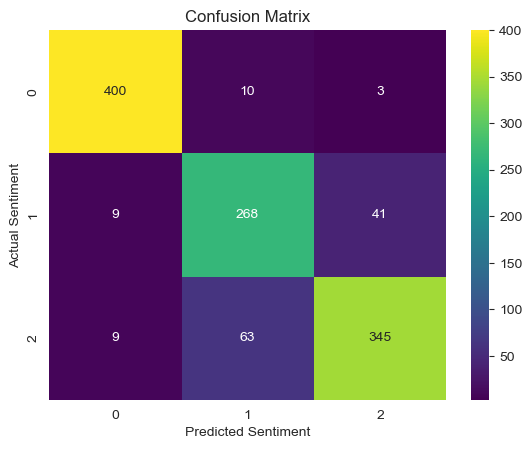

In [113]:
# Running the confusion matrix
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
confusion_matrix(y_val, y_pred_grid_search)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_grid_search))

# Visualize the confusion matrix using a heatmap
import seaborn as sns

# Create a heatmap
sns.heatmap(confusion_matrix(y_val, y_pred_grid_search), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()

## Testing the Model on the Test dataset

In [114]:
# Testing the model using the unseen dataset

y_pred_test = grid_search.predict(X_test)

# Evaluate the classifier using the best parameters
accuracy_grid_search = accuracy_score(y_test, y_pred_test)
print("Accuracy (Grid Search):", accuracy_grid_search)

print(classification_report(y_test, y_pred_test))

Accuracy (Grid Search): 0.8699059561128527
              precision    recall  f1-score   support

    negative       0.92      0.96      0.94       230
     neutral       0.79      0.82      0.81       176
    positive       0.89      0.82      0.85       232

    accuracy                           0.87       638
   macro avg       0.86      0.87      0.86       638
weighted avg       0.87      0.87      0.87       638



This indicates that the model is capable of performing well on unseen data. The validation results show strong performance in classifying negative and positive sentiments, similar to the previous model, but there is a slight decline in performance for neutral sentiment classification. The variations in metrics suggest that while the model is generally reliable, there may be some inconsistencies when handling unseen data, particularly with neutral sentiments.

## Model Evaluation
* Logistic Regression: Achieved 82% accuracy, with the best performance on negative sentiments and balanced results across all classes.

* SVM: Improved to 84% accuracy, excelling in the negative class (F1: 0.93), but struggled slightly with neutral sentiments. Overall, slightly better than Logistic Regression.

* Random Forest: Highest accuracy at 87%. Strong in the negative class (F1: 0.97) and performed well with positive sentiments, but slightly weaker on neutral instances.

* Naive Bayes: Lowest accuracy (79%). Good performance on negative sentiments (F1: 0.89), but struggled with the neutral class (F1: 0.69).

* NLP_SVC Model: Achieved 84% accuracy, performing well on negative instances (F1: 0.93) and decently on neutral and positive classes.

* Tuned NLP (Grid Search CV): After tuning, accuracy improved to 88%. Strong across all classes, especially in the negative class (F1: 0.96), with improvements in neutral and positive sentiment detection.

In conclusion, the NLP_SVC model with Grid Search CV performed well, achieving an accuracy of 88% across all classes. The model's performance for negative sentiments, neutral sentiments, and positive sentiments was improved after hyperparameter tuning, leading to better overall classification results. The tuning process further enhanced the model's performance, making it more reliable for sentiment analysis tasks. The model's robustness and ability to handle diverse sentiments make it a valuable tool

# Summary of Findings

* The sentiment for Apple is predominantly neutral, with a significant amount of negative sentiment. This suggests that while there is a strong user base, many users may feel indifferent or have mixed feelings about their products.
* Google has a more balanced sentiment profile, but the overall positive sentiment is lower compared to Apple. This indicates that while some users appreciate Google products, many have negative or neutral feelings.

# Recommendation

* It could be beneficial for NiaTech to focus on addressing customer concerns regarding Apple products (reflected in the negative sentiment) and enhance user engagement to shift more neutral sentiments to positive ones. Consider conducting customer feedback surveys or improving customer service and product features based on feedback.

* NiaTech should explore why the positive sentiment related to Google products is lower—this could involve improving product features, addressing common complaints, or enhancing marketing strategies to better communicate product benefits.

* NiaTech should also invest in researching and implementing strategies to address the sentiments of their customers. This could include:

>- Continuously monitoring sentiments to identify shifts and esnuring issues are adressed before they become widespread negative trends.
>- Developing marketing campaigns that speak directly to the neutral and negative sentiment group, with tailored messaging to convert them to positive sentiment customers.
>- Use the timing of major product launches from Apple or Google (e.g., new iPhone or Pixel models) to craft sentiment-driven messages. If neutral sentiments persist around certain product categories, address those aspects directly in the messaging.

* Use sentiment data to segment customers into different groups (e.g., Apple enthusiasts, neutral customers, dissatisfied Google users) and tailor messaging accordingly. Sentiment-driven segmentation will help NiaTech create more personalized marketing strategies.

* Since a larger share of tweets and public attention is directed toward Apple products, NiaTech should capitalize on this by creating more Apple-centric marketing campaigns. Leveraging Apple's brand visibility could enhance customer engagement and drive sales.

By leveraging these insights, NiaTech can make targeted improvements to enhance customer satisfaction and sentiment towards Apple and Google products. 

## Room for Improvement
The dataset does have limitations. Interpreting tweet sentiment can be complex due to contextual factors and sarcasm. Additionally, it may not fully represent all sentiments expressed on Twitter, potentially impacting the comprehensiveness of our analysis.Another possible limitation on the **Is_there_an_emotion_directed_at_a_brand_or_product** is that the sentiments were rated by humans who are prone to bias depending on their emotions and understanding of the sentiment categories. It would be interesting to consider using techniques such as VADER to capture the machine labelled sentiments.

Overall, the models demonstrate effectiveness, but further refinement could enhance the classification of neutral sentiments. Additionally, examining any misclassifications in the unseen data could offer valuable insights for improving future iterations of the model.

Extend the analysis over a longer time period to observe trends and changes in sentiment over time.

Analyze sentiment based on user demographics such as age, gender and location.

Applying an Algorithm instead of human sentiment classification is needed to reduce the number of neutral sentiments, algorithms are less subject to bias and other human limitations. In this case Tuned NLP model is recommendable.